# Pollution in Cities (SO2, NO2)

##### Adjust margins in jupyter notebook

In [127]:
# Display page w/ 90% margins
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### Import dependencies

In [128]:
# Reading data
import pandas as pd
# Plotting data 
import matplotlib.pyplot as plt
# Plotting data 
import seaborn as sns

### Read data to dataframe

In [129]:
# Read data to dataframe
pollution = pd.read_csv('C:\\Users\\Robert.Jones\\Documents\\Python_Projects\\data_visualization\\pollution_data\\pollution_data_city.csv')

### Brief data exploration

In [130]:
# Print first 5 rows
pollution.head(5)

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15
4,Cincinnati,2012,1,5,0.345,21.0,0.016,11.05


In [131]:
# Print schema
pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8888 entries, 0 to 8887
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    8888 non-null   object 
 1   year    8888 non-null   int64  
 2   month   8888 non-null   int64  
 3   day     8888 non-null   int64  
 4   CO      8888 non-null   float64
 5   NO2     8888 non-null   float64
 6   O3      8888 non-null   float64
 7   SO2     8888 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 555.6+ KB


## Highlighting data

### Simple Plot

<AxesSubplot:title={'center':'Houston Pollution 2012-2015'}, xlabel='NO2', ylabel='SO2'>

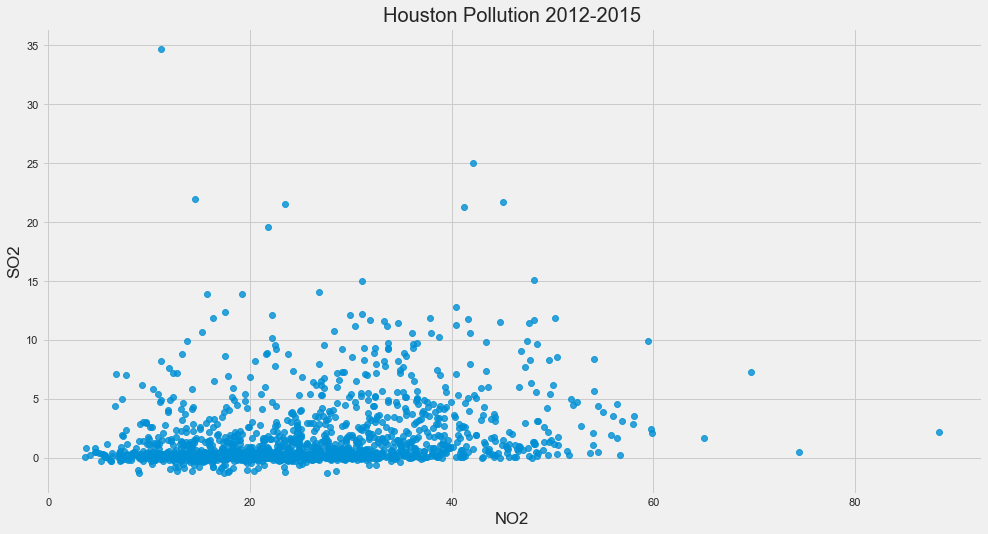

In [132]:
# Let's take a closer look at Houston 
houston_pollution = pollution[pollution.city == 'Houston']

# ... set title
plt.title("Houston Pollution 2012-2015",fontsize = 20)

# ... and plot it
sns.regplot(x = 'NO2', y='SO2',data = houston_pollution, fit_reg = False)


### Highlight a certain date

Text(4759    45.1
Name: NO2, dtype: float64, 4759    21.675
Name: SO2, dtype: float64, '11/26/2014')

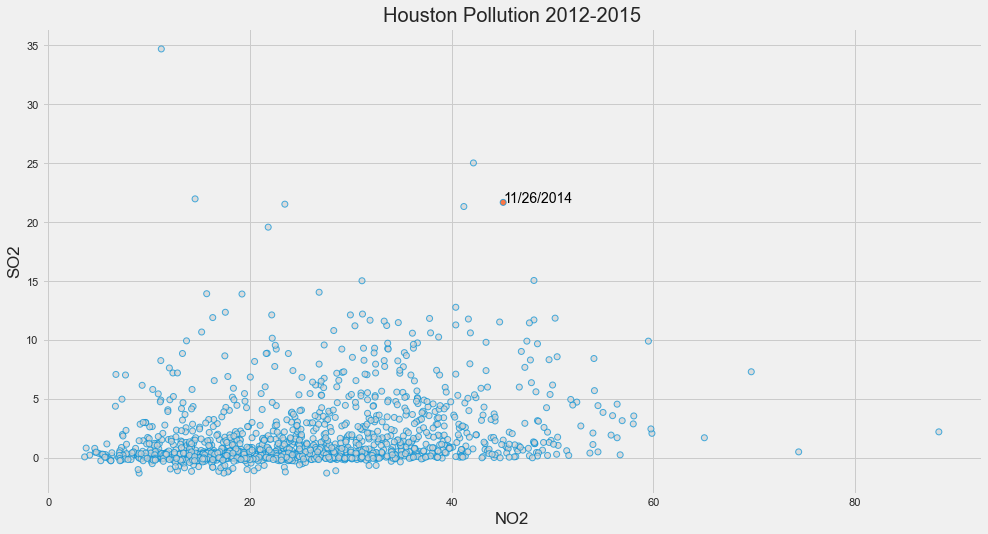

In [136]:
# Highlighting 11/26/2014 in Houston, Texas

# Set aesthetic 
plt.style.use('fivethirtyeight')

# ... use a list comprehension to find date and color the point orange
houston_colors = ['orangered' if (day  ==  330) & (year  ==  2014) else 'lightgray' 
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]
# ... and plot it
sns.regplot(x = 'NO2', y='SO2',data = houston_pollution, fit_reg = False, scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.title("Houston Pollution 2012-2015",fontsize = 20)

# Add text annotations

# ... Find a specific date (for example...day = 330 and year = 2014)
day = houston_pollution[houston_pollution.day == 330]
year = day[day.year == 2014]
# ... x-value
NO2 = year.NO2
# ... y-value
SO2 = year.SO2

# ... annotation the date
plt.text(NO2, SO2, "11/26/2014", horizontalalignment='left', size='medium', color='black')


### Highlight maximums

Text(4245    11.2
Name: NO2, dtype: float64, 34.7, 'Max SO2 = 34.7')

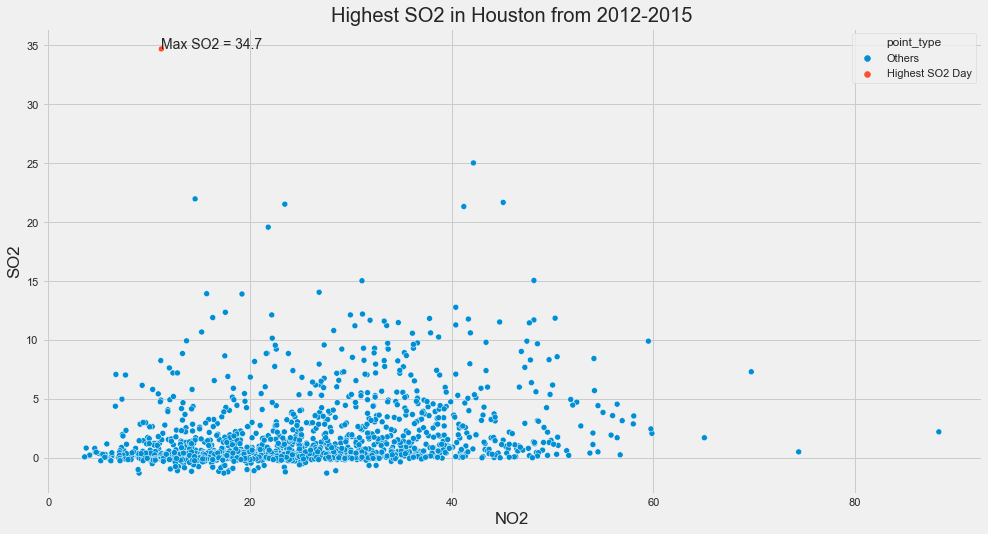

In [134]:
# Highlighting Max SO2

# Set aesthetic 
plt.style.use('fivethirtyeight')

# Make a copy of houston_pollution
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

# Find and Highlight Maximum SO2

# ...set title 
plt.title("Highest SO2 in Houston from 2012-2015",fontsize = 20)


# ...find max SO2
max_SO2 = houston_pollution.SO2.max()
# ...with new column "point_type", find highest SO2 day
houston_pollution['point_type'] = ['Highest SO2 Day' if SO2  ==  max_SO2 else 'Others' for SO2 in houston_pollution.SO2]
# ...plot it
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point_type',
                data = houston_pollution)

# ... annotate max SO2
max_SO2_NO2 = houston_pollution[houston_pollution.SO2 == max_SO2]
plt.text(max_SO2_NO2.NO2, max_SO2,f"Max SO2 = {max_SO2}")



Text(88.3, 4822    2.2
Name: SO2, dtype: float64, 'Max NO2 = 88.3')

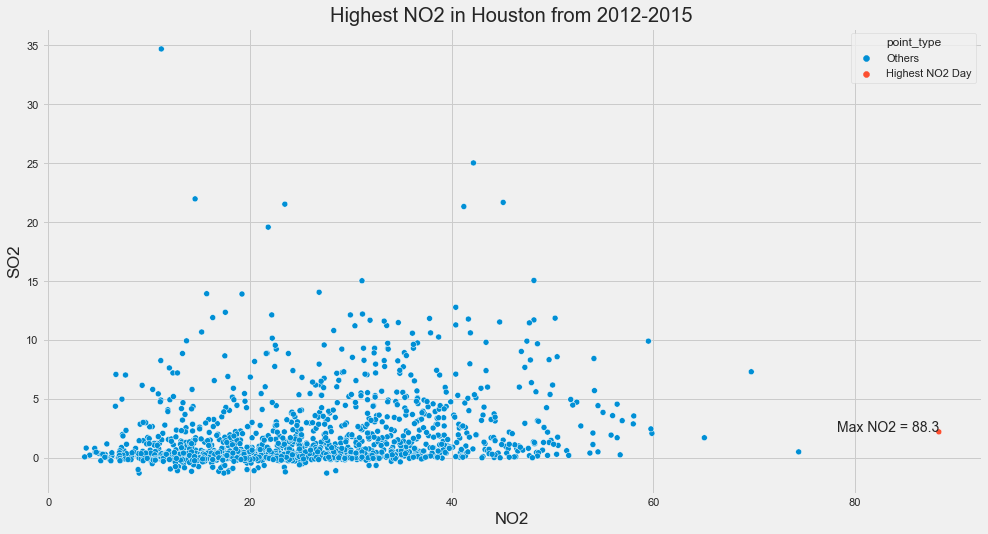

In [135]:
# Highlighting Max NO2

# Set aesthetic 
plt.style.use('fivethirtyeight')

# Make a copy of houston_pollution
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

# Find and Highlight Maximum NO2

# ...set title 
plt.title("Highest NO2 in Houston from 2012-2015",fontsize = 20)


# ...find max SO2
max_NO2 = houston_pollution.NO2.max()
# ...with new column "point_type", find highest NO2 day
houston_pollution['point_type'] = ['Highest NO2 Day' if NO2  ==  max_NO2 else 'Others' for NO2 in houston_pollution.NO2]
# ...plot it
sns.scatterplot(x = 'NO2',y = 'SO2',hue = 'point_type',data = houston_pollution)

# Annotate max NO2
max_NO2_SO2 = houston_pollution[houston_pollution.NO2 == max_NO2]
plt.text(max_NO2,max_NO2_SO2.SO2, f"Max NO2 = {max_NO2}",horizontalalignment='right')

